In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit,njit,float64,int32
import numba as nb
import pandas as pd
from derivative import dxdt
import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt



import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


# Frailty Index Model

# $    \frac{df}{dt} = (1-f)( d+ \alpha f) - f\cdot r \cdot (1-sf)$


# Mortality Models

# $\mu = f(t)^c$


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


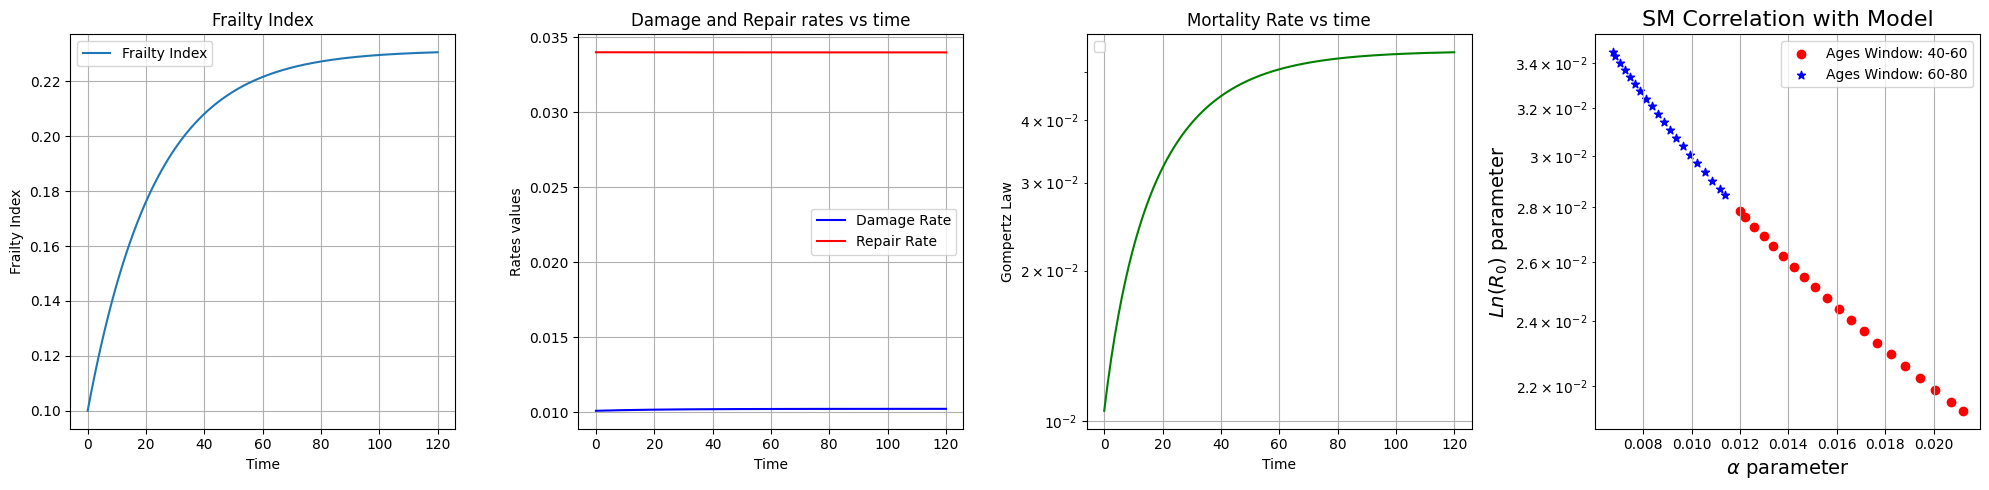

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


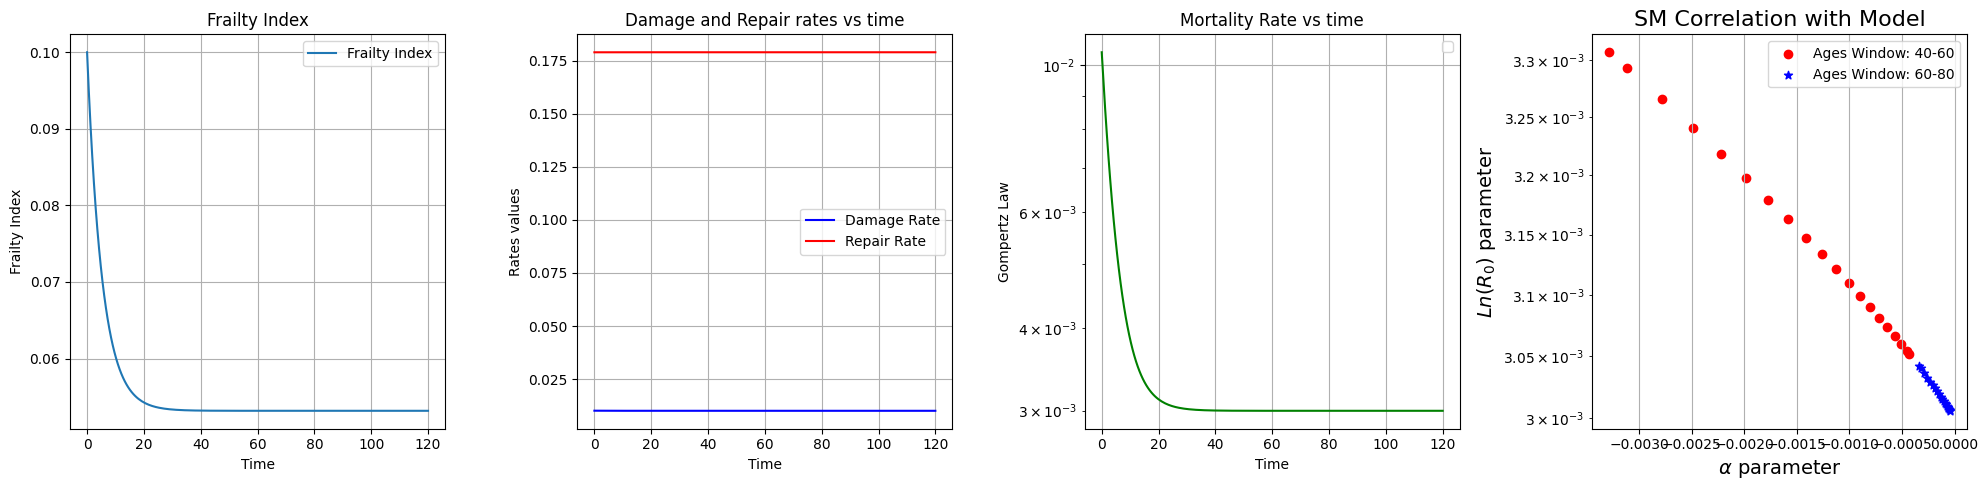

/var/folders/9w/7pgd2w3n7j3fprw9mqstx8n80000gn/T/ipykernel_6516/1006101051.py:34: RuntimeWarning: invalid value encountered in power
  gompertz_law_differential_equation = frailty_index**c
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


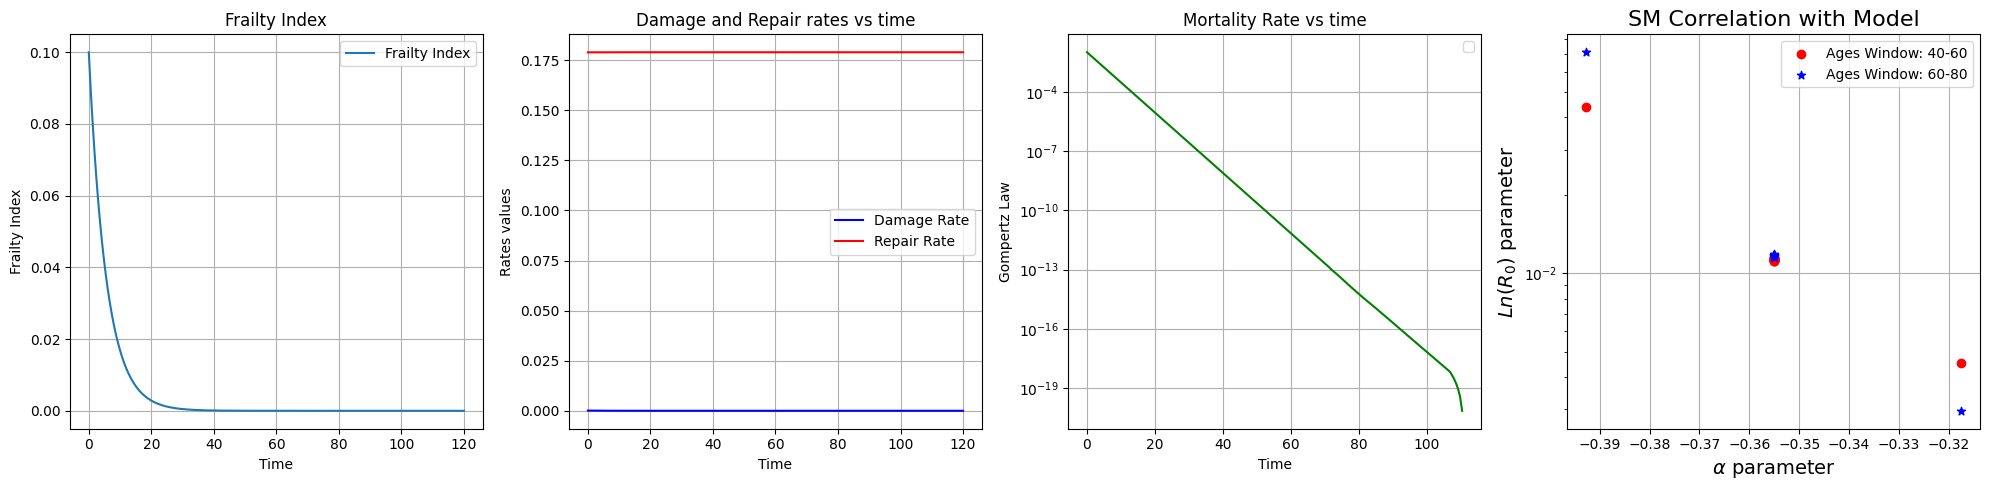

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


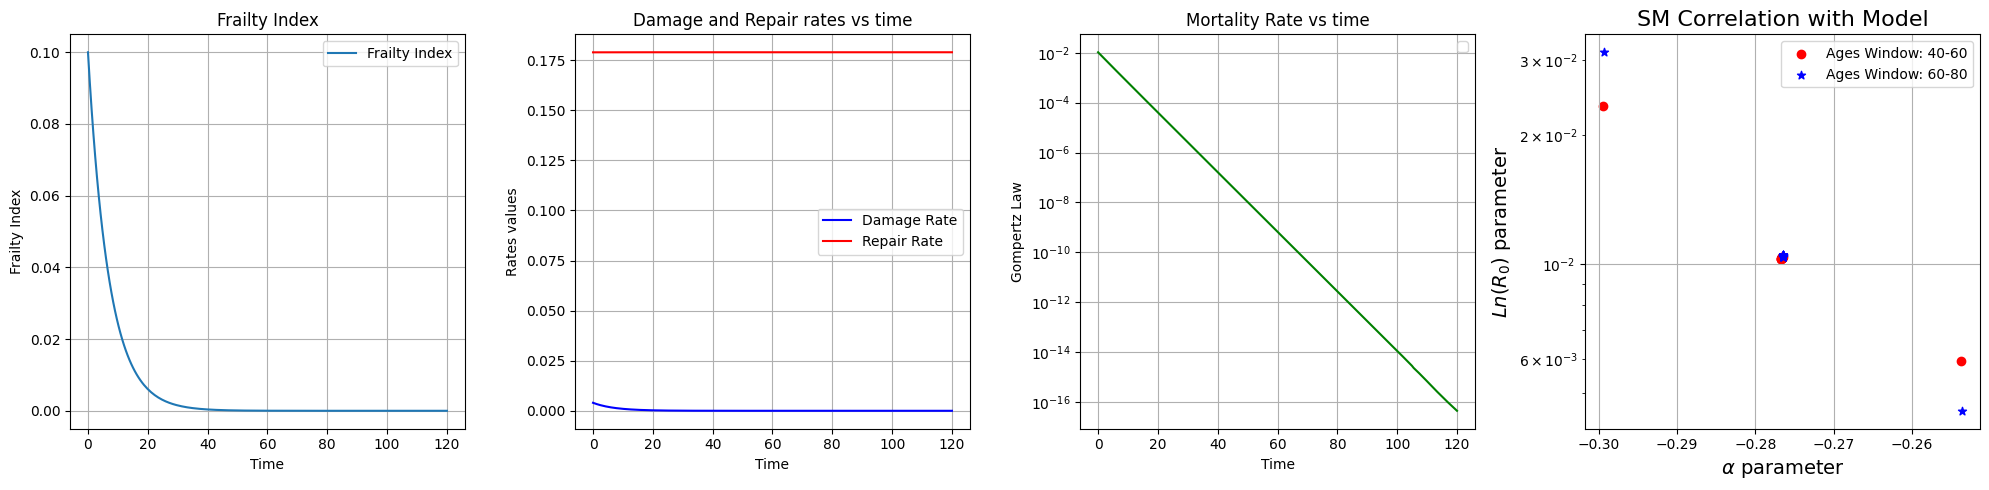

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


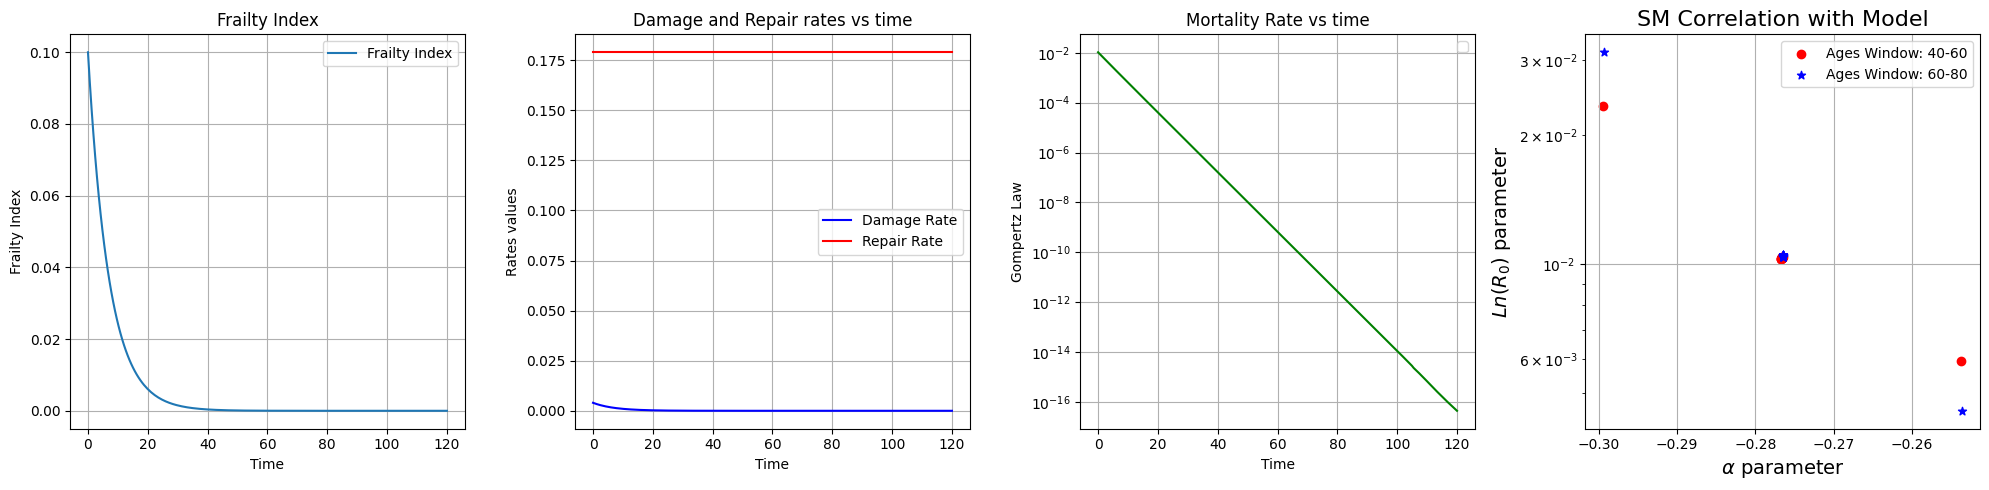

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


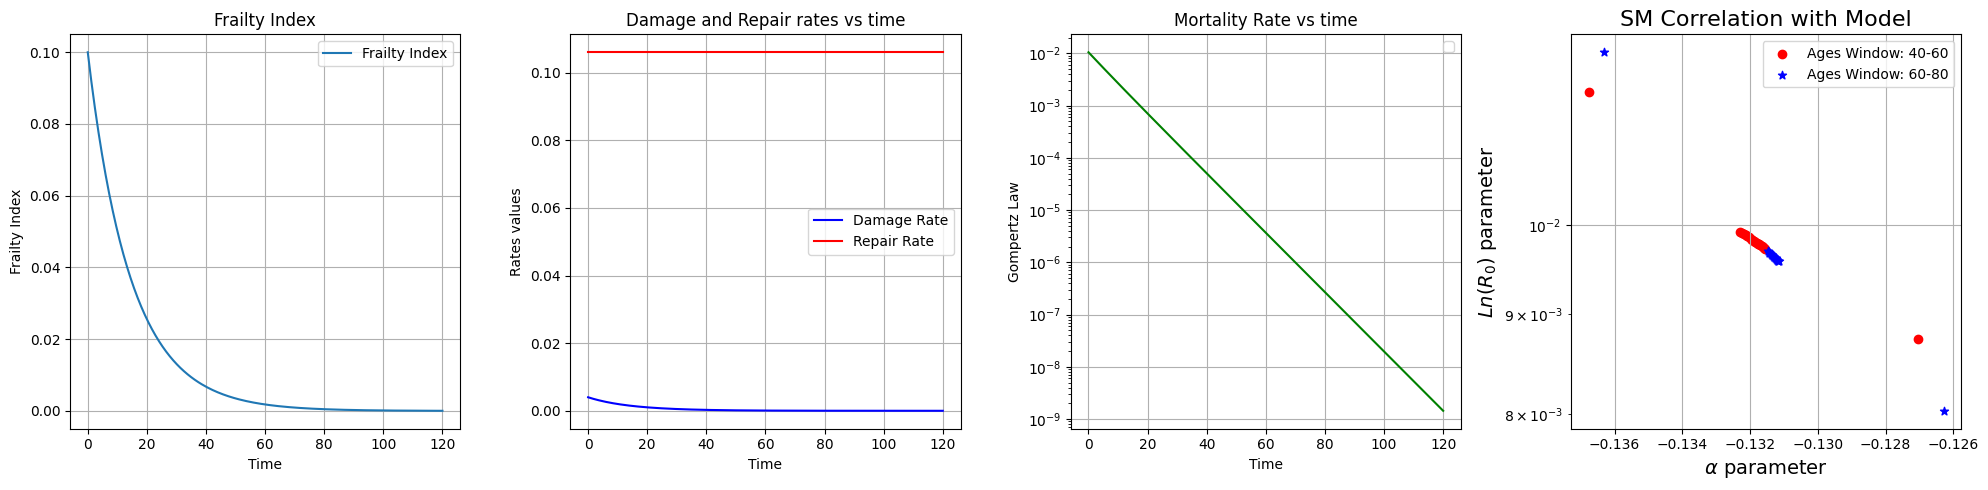

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


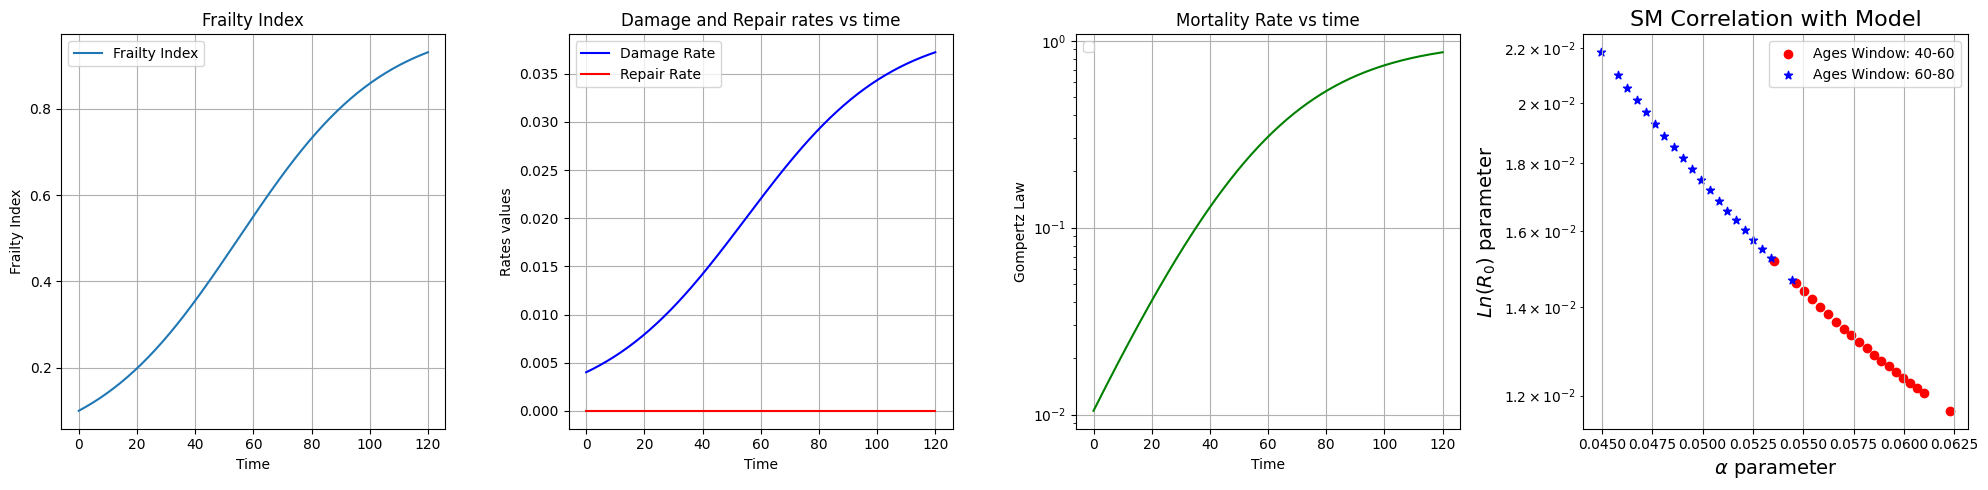

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


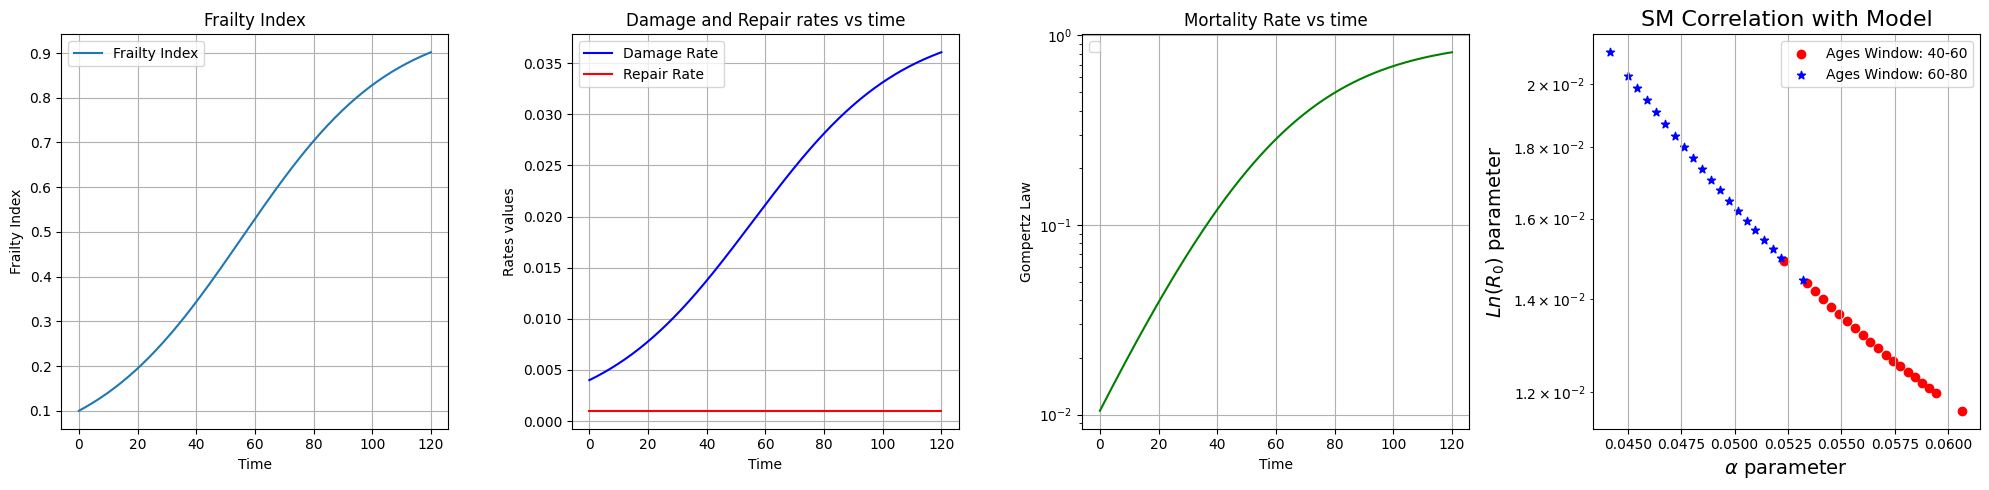

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


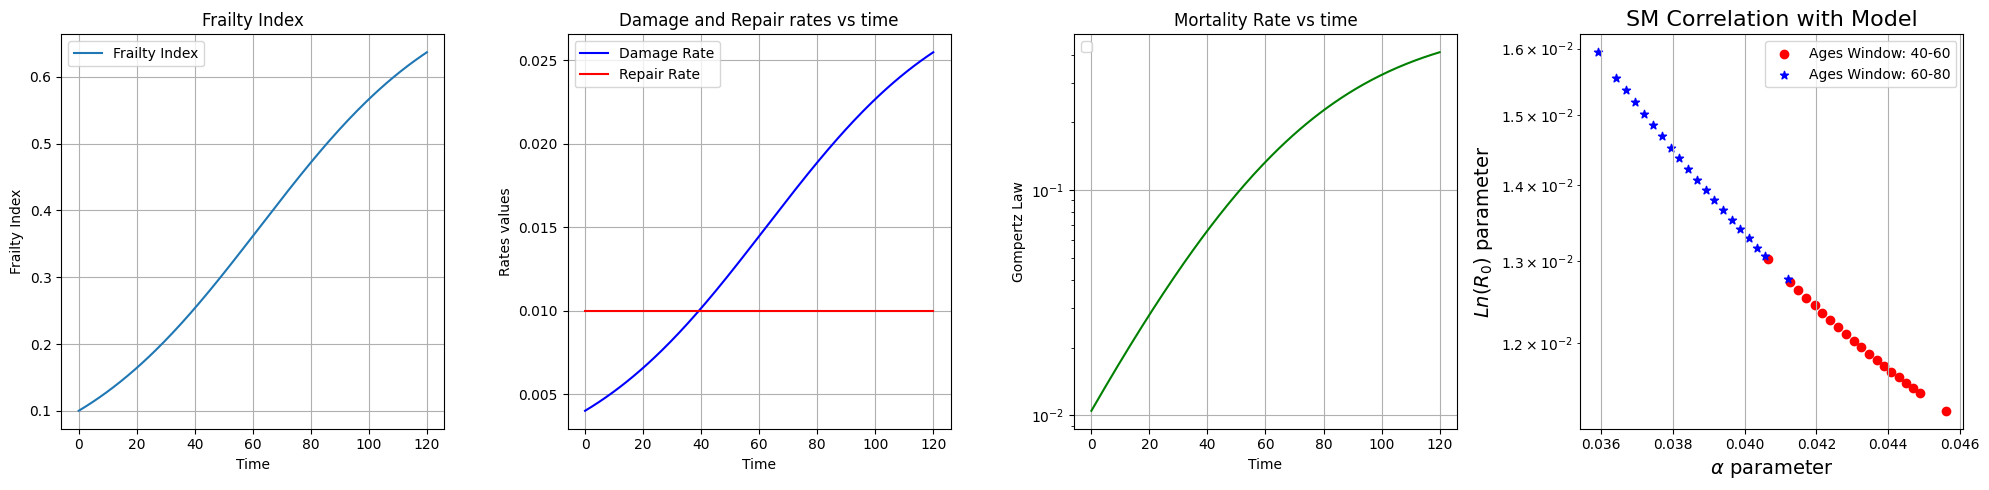

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


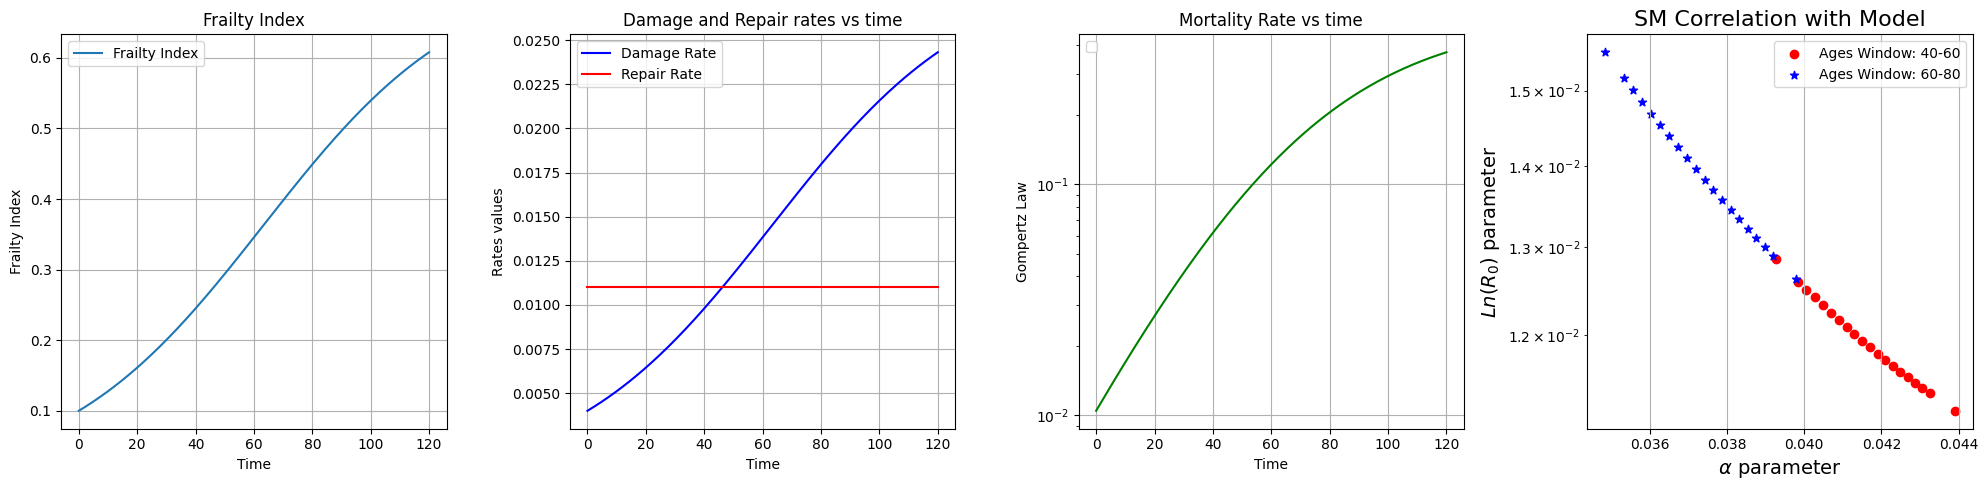

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


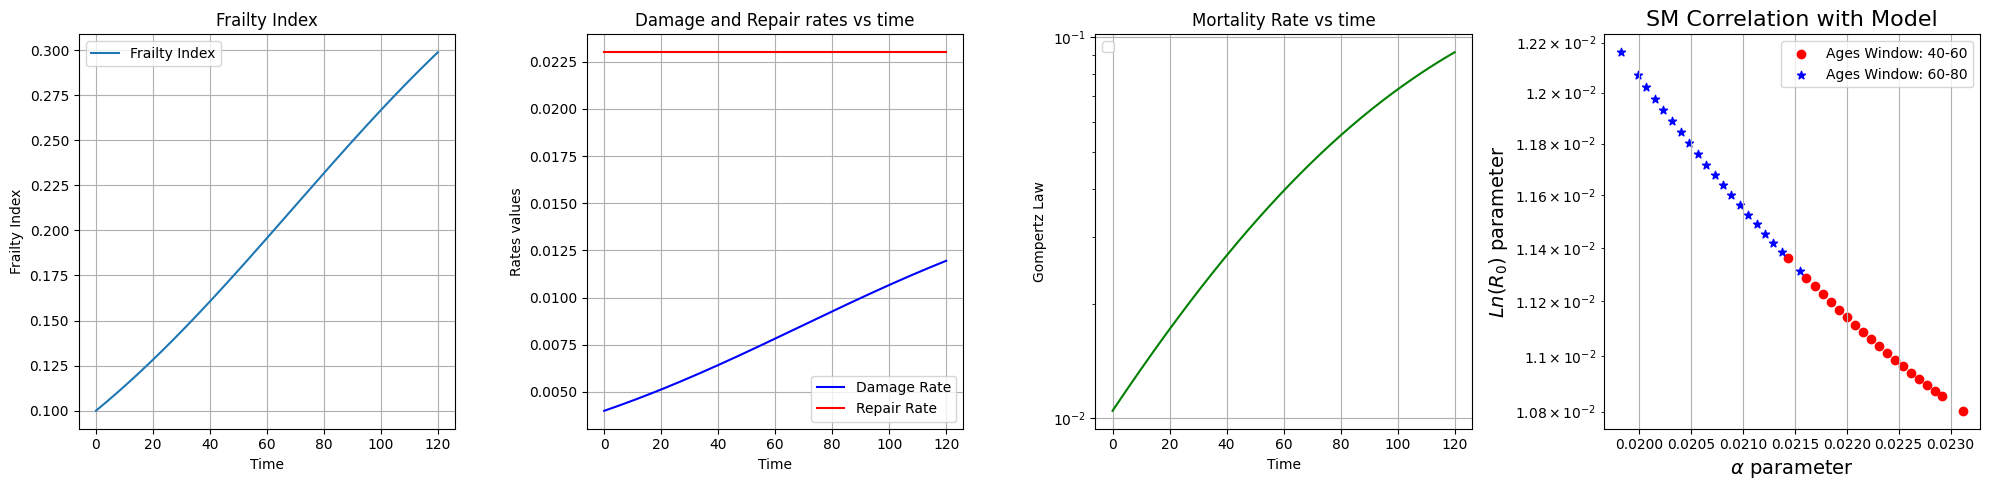

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


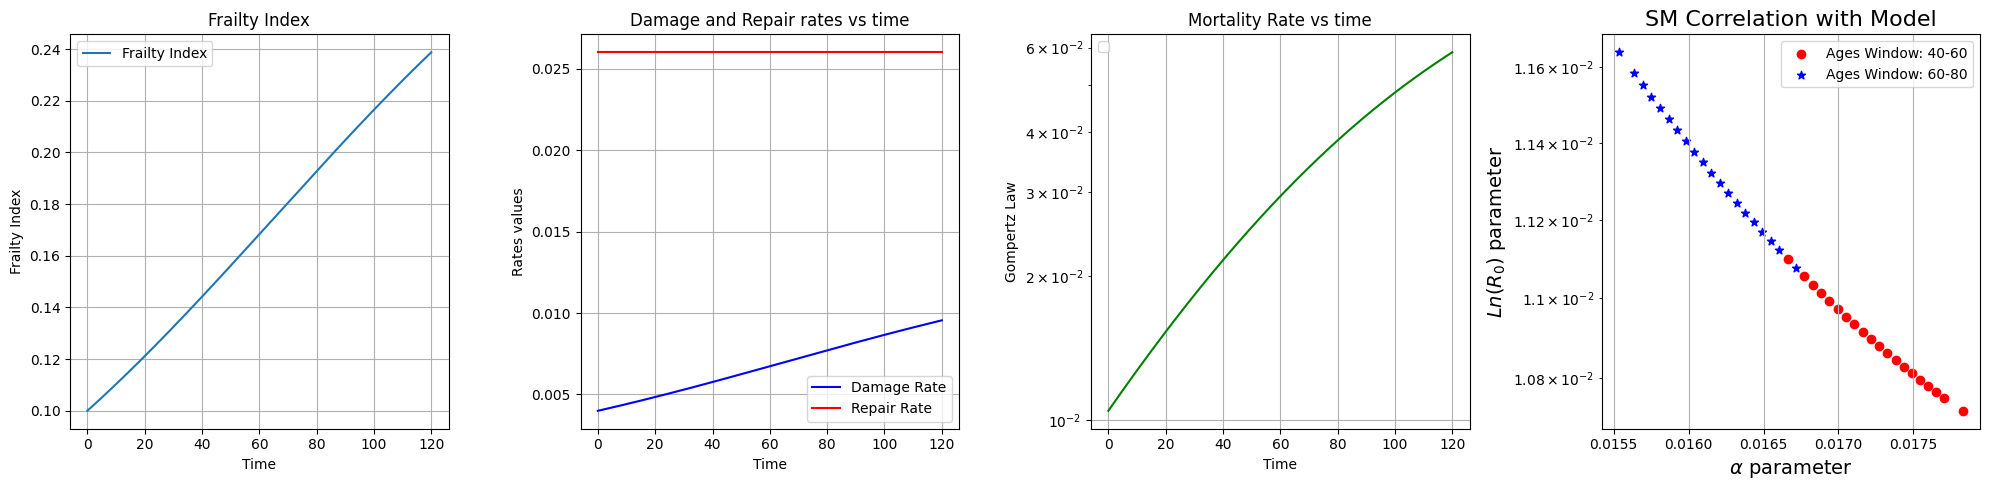

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


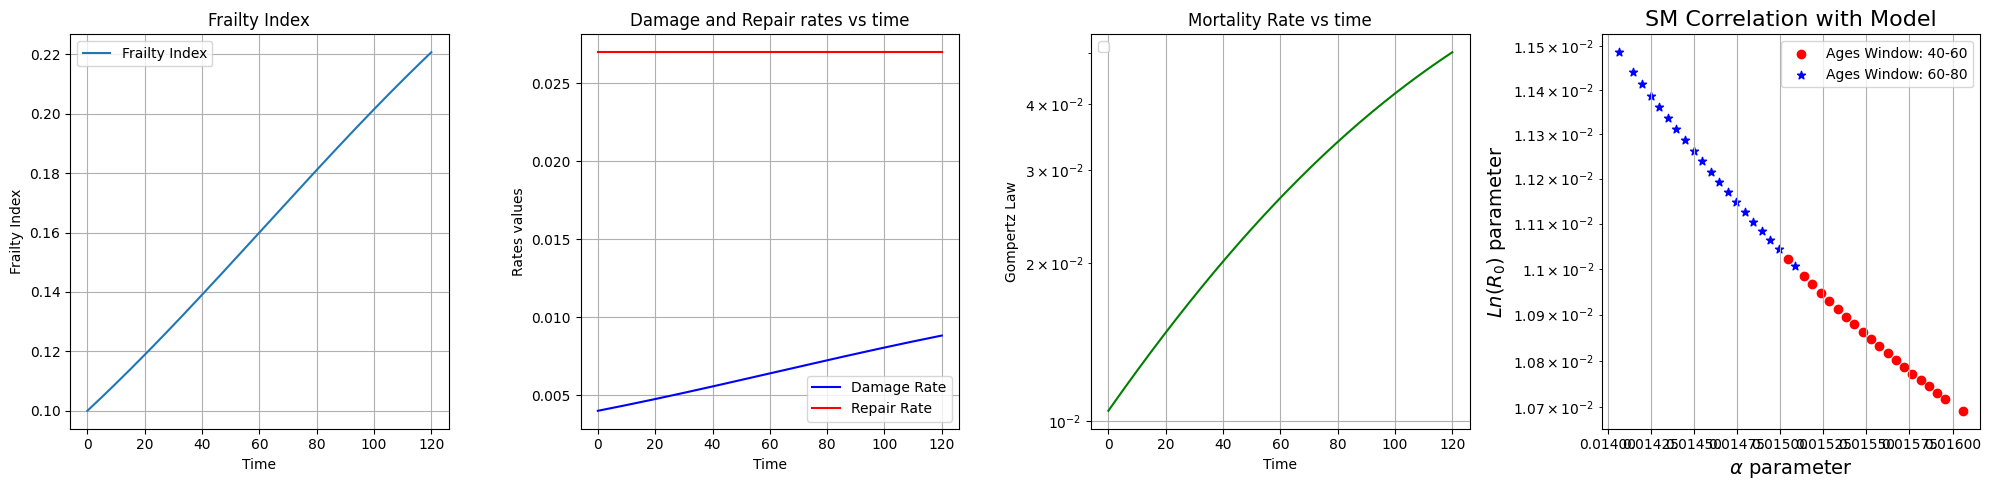

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


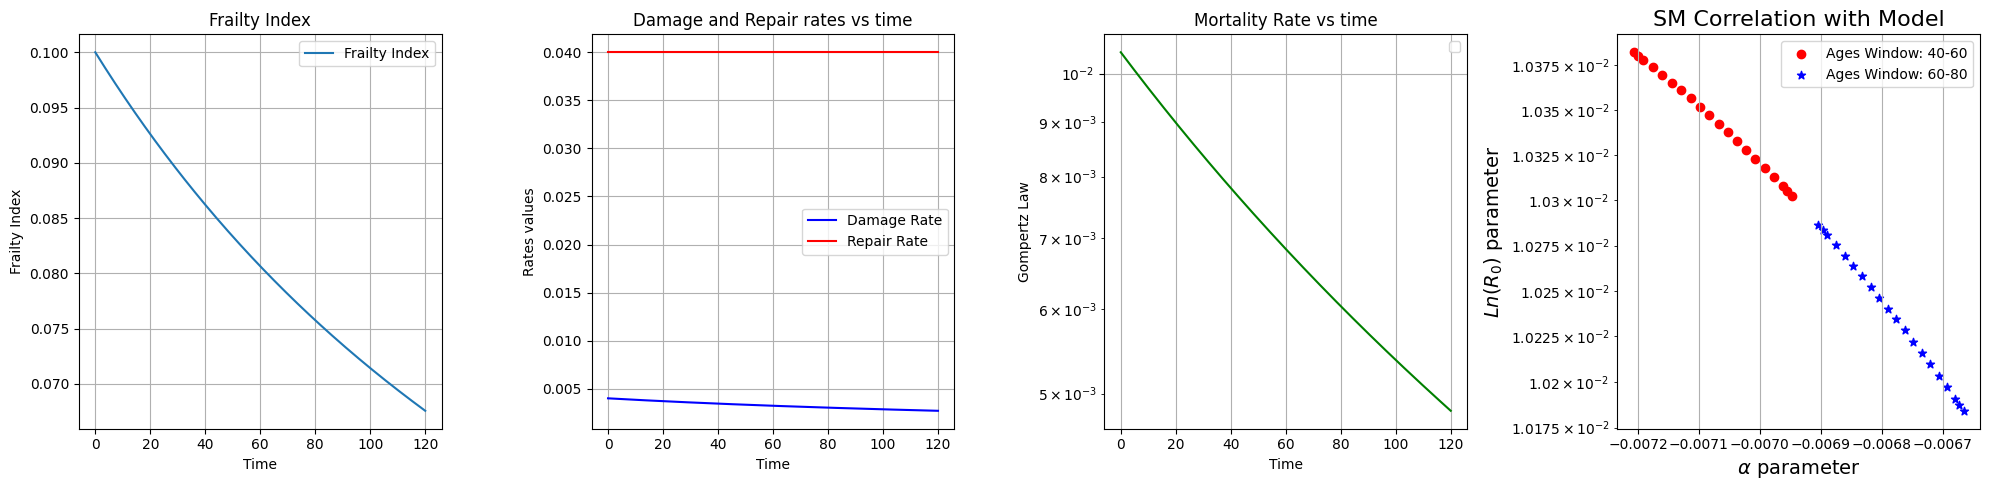

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


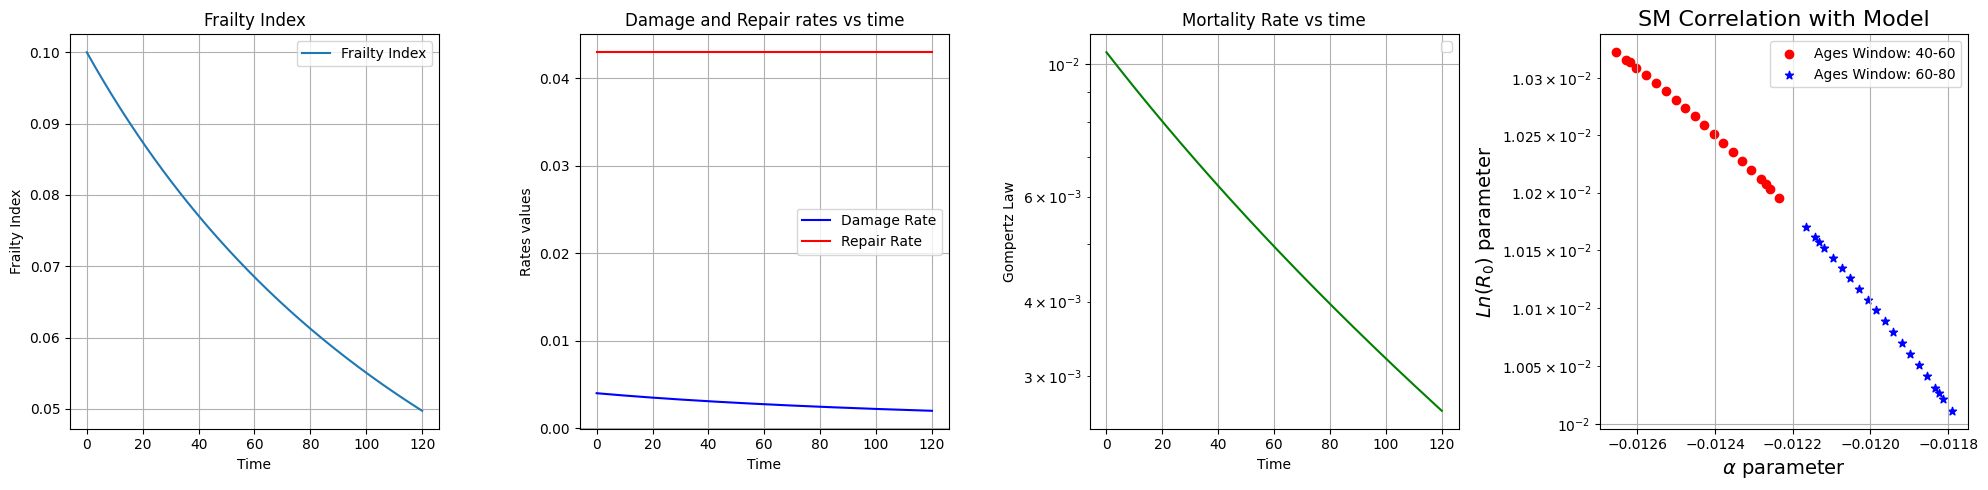

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


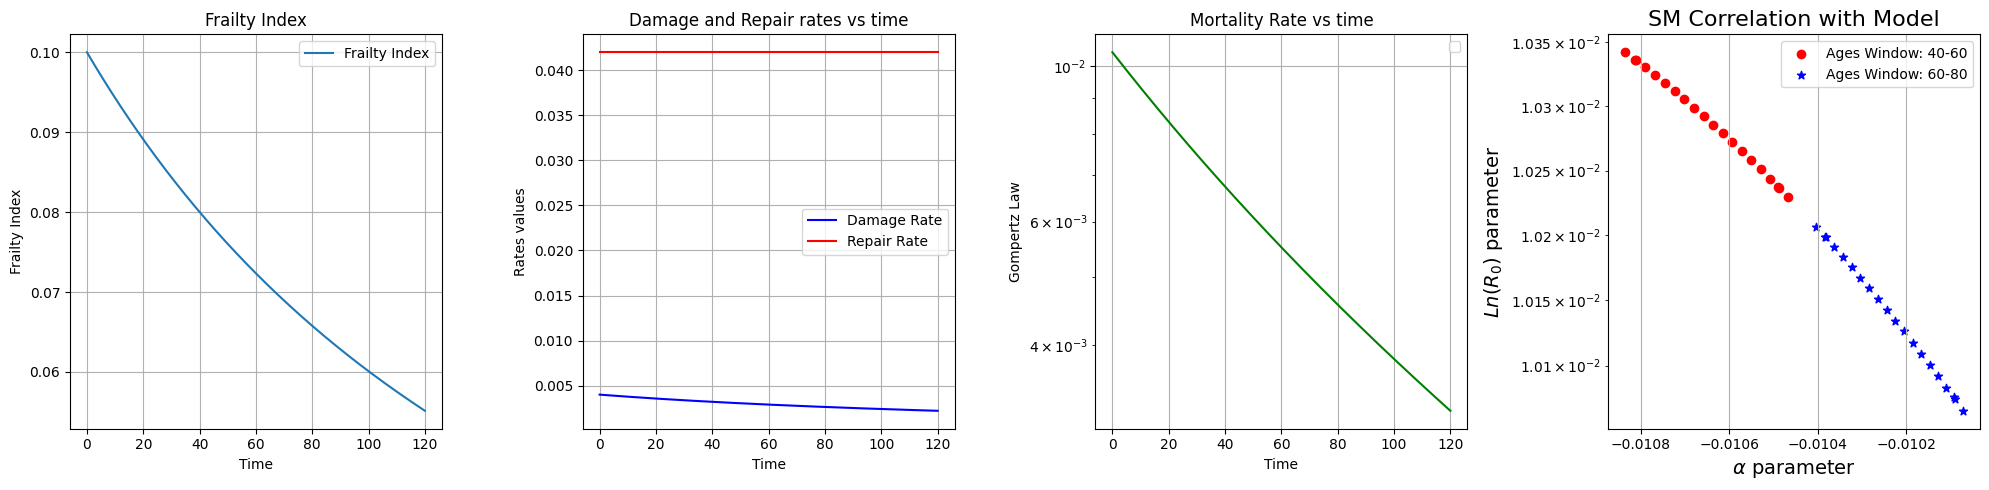

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


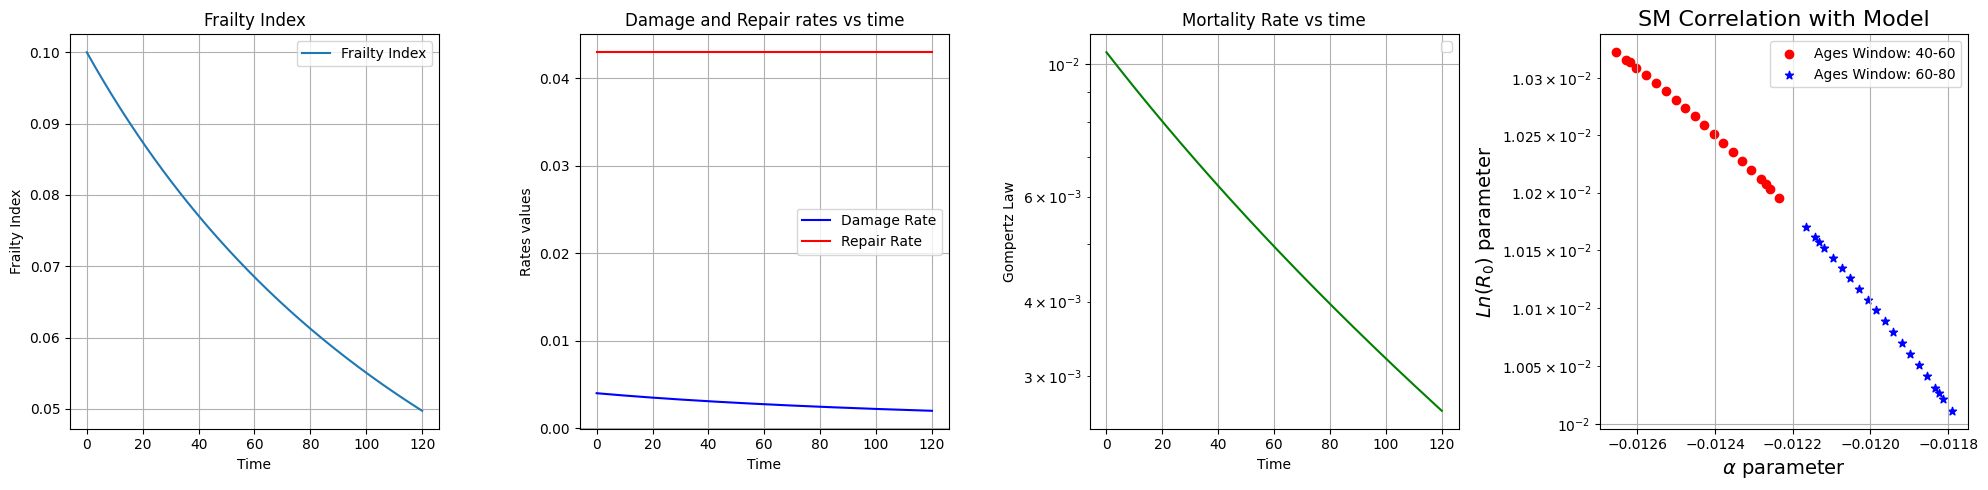

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


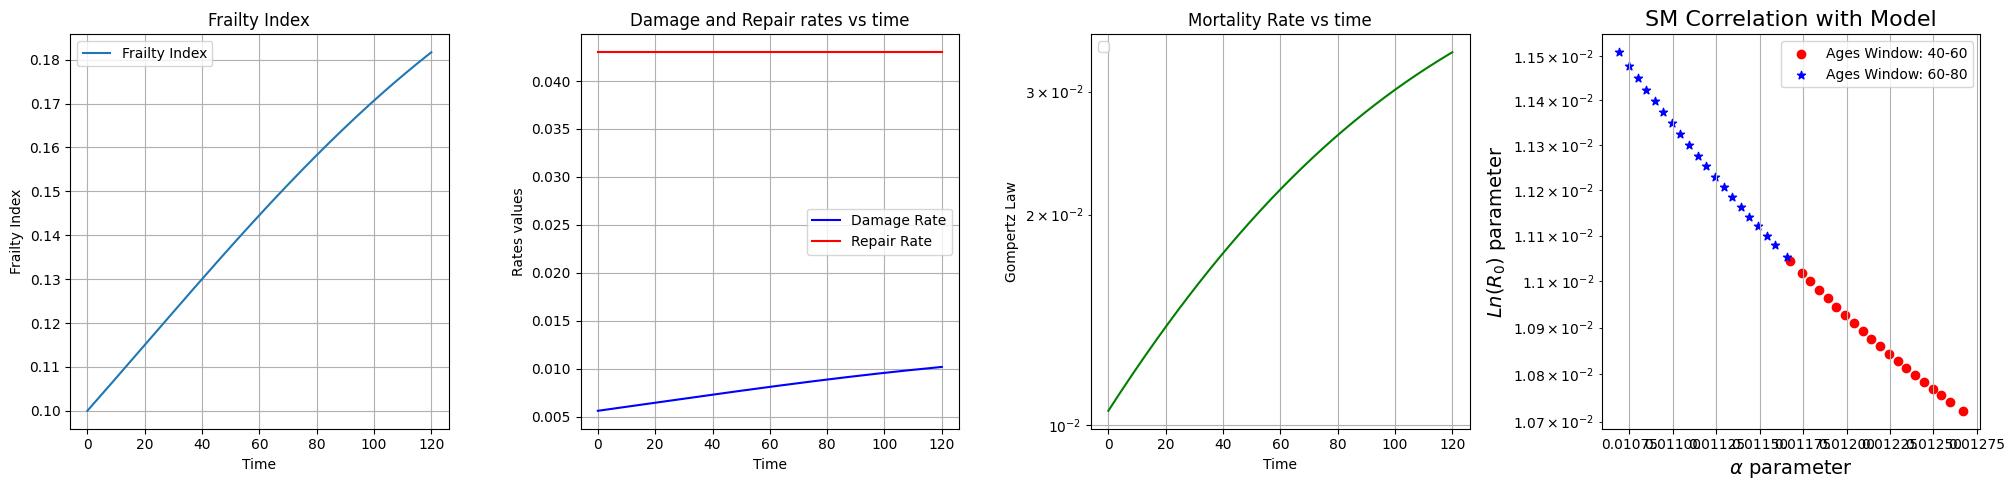

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


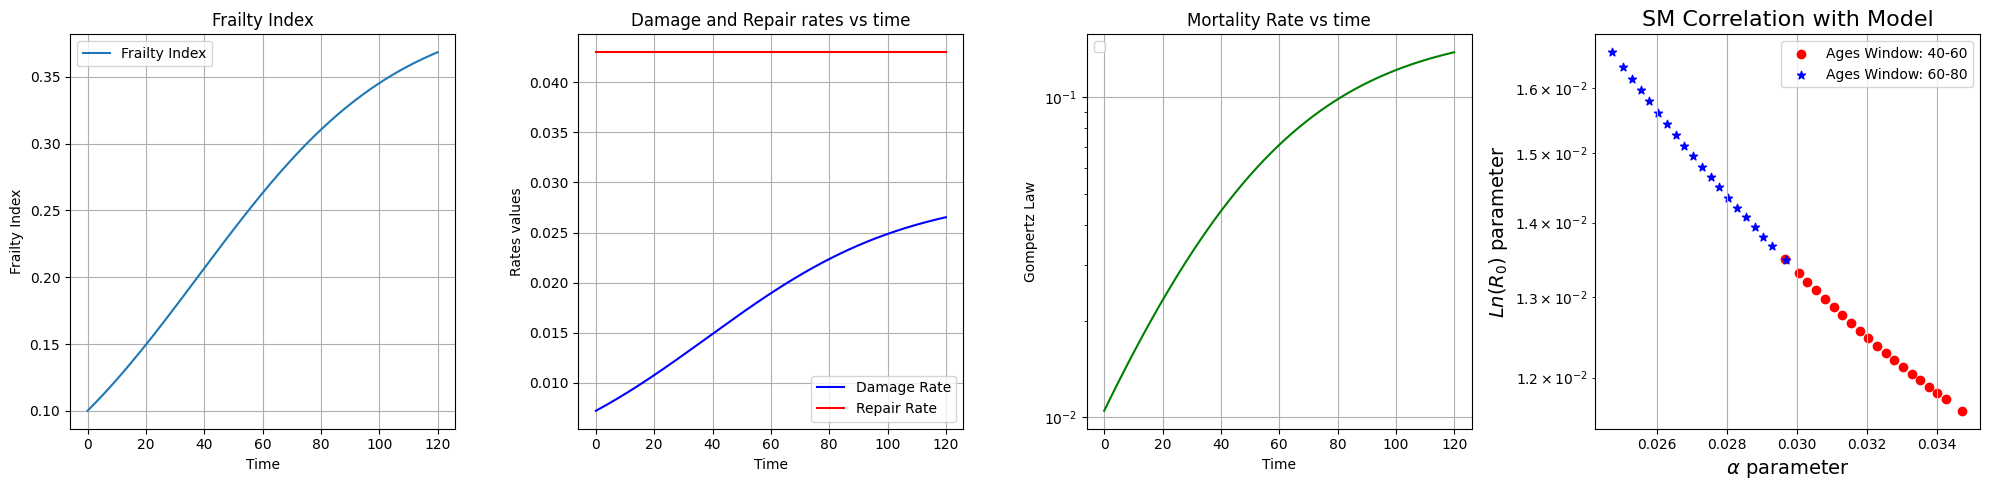

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


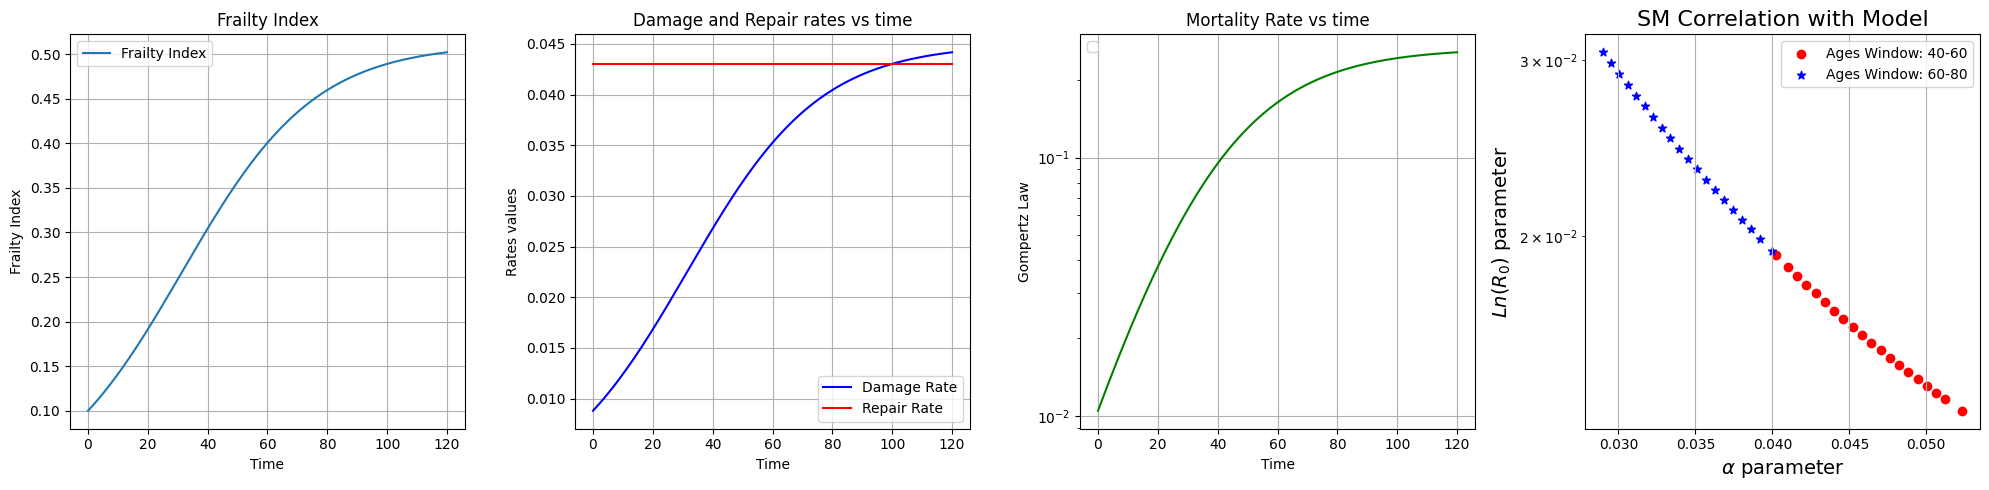

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


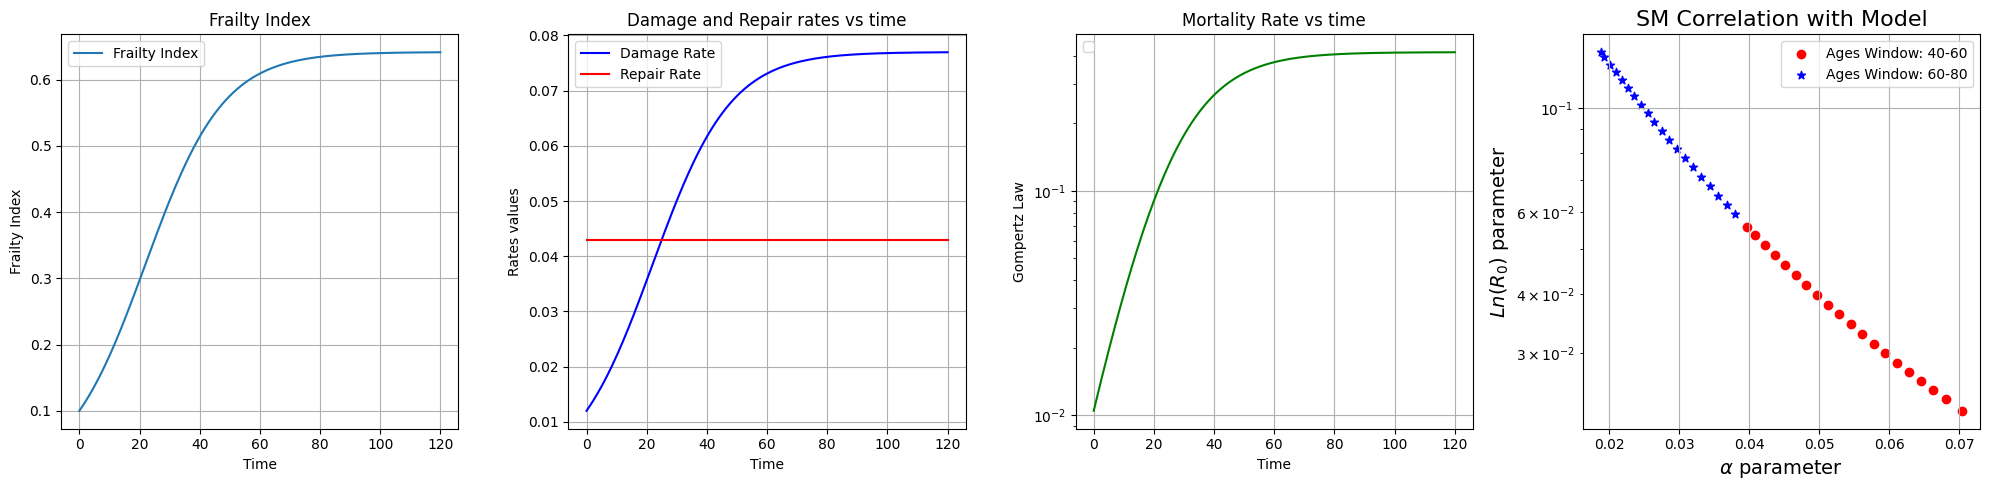

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


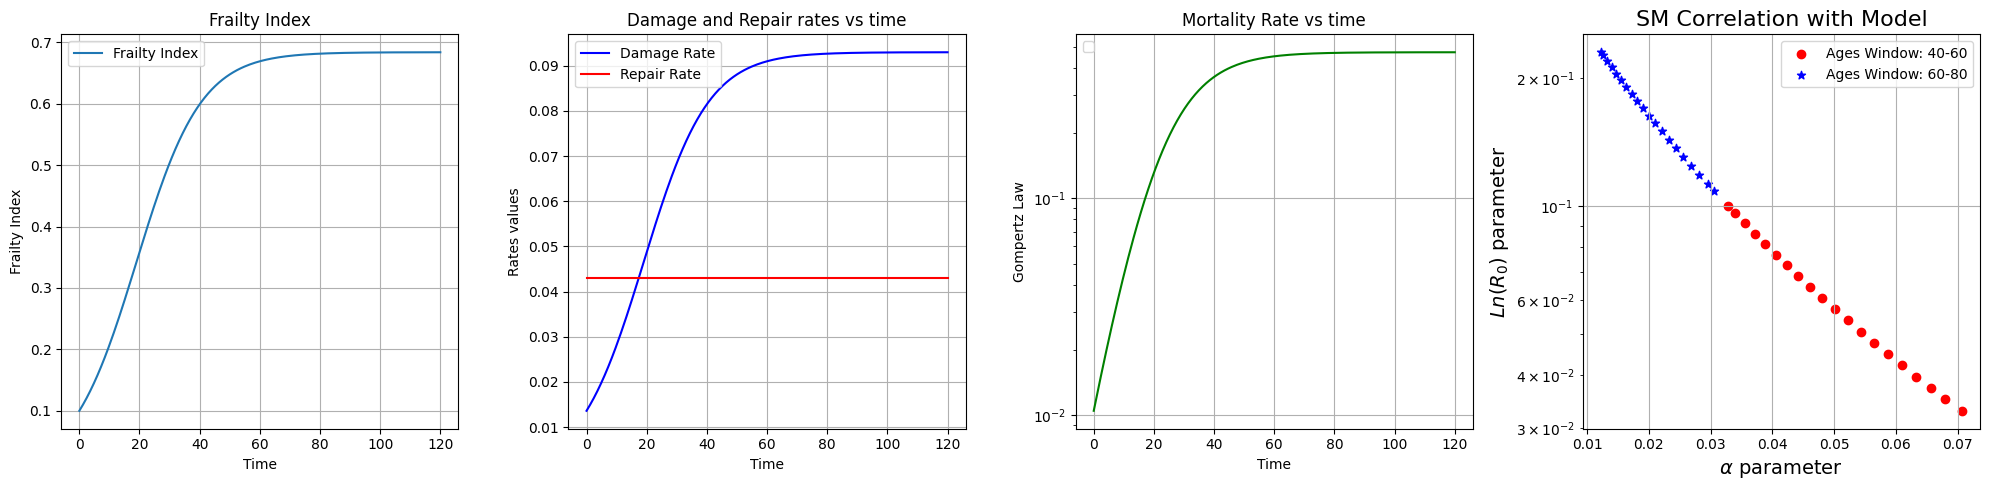

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


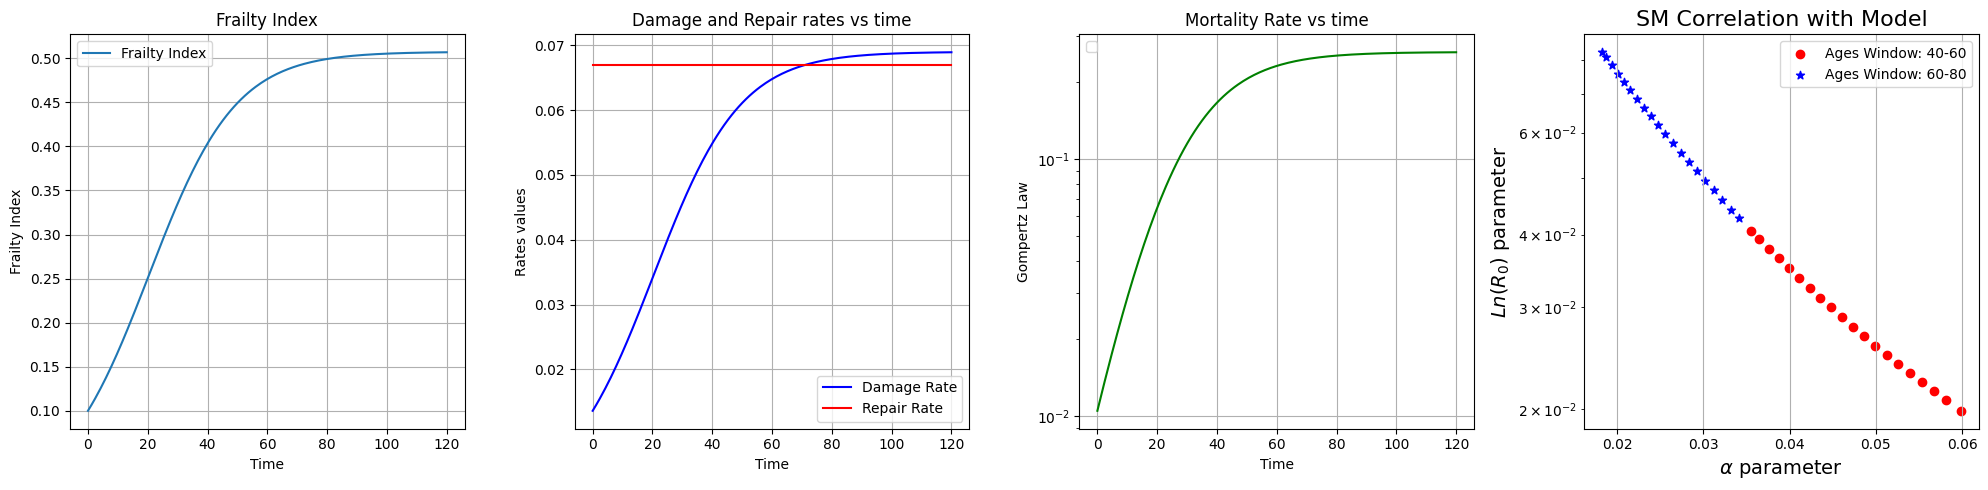

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


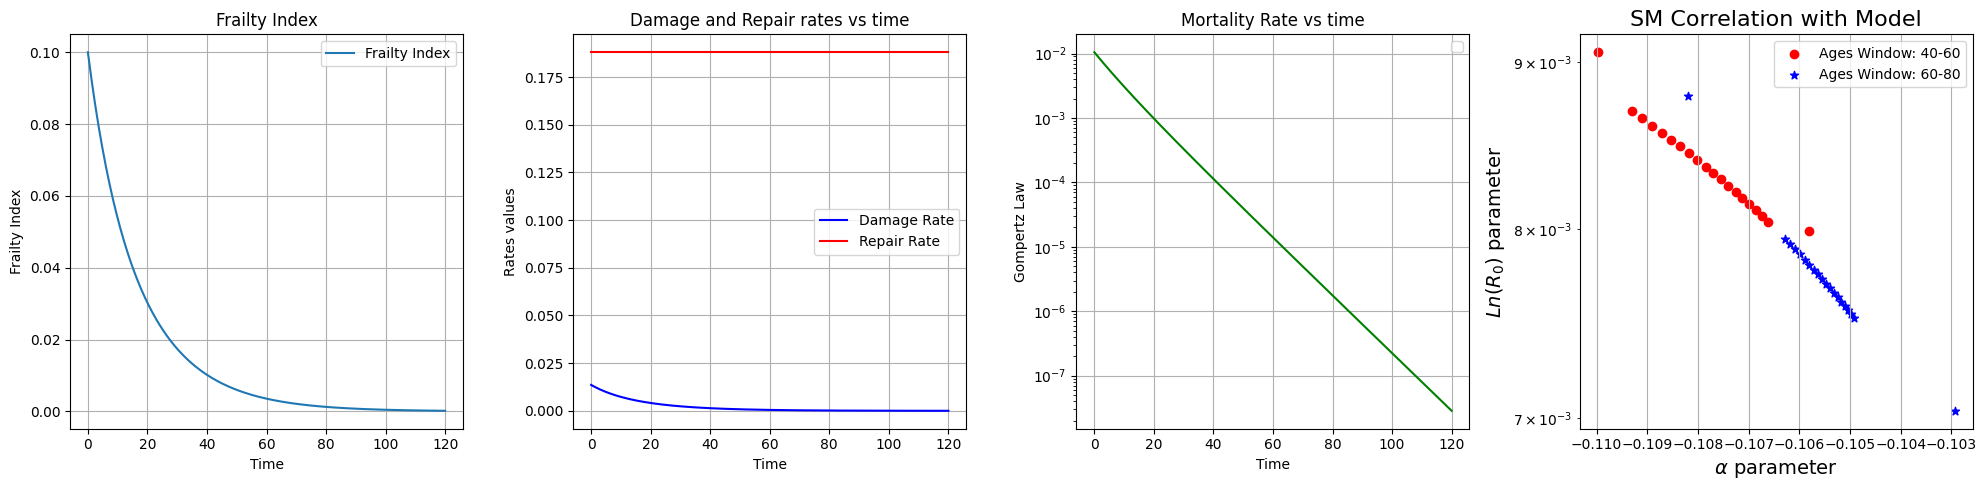

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


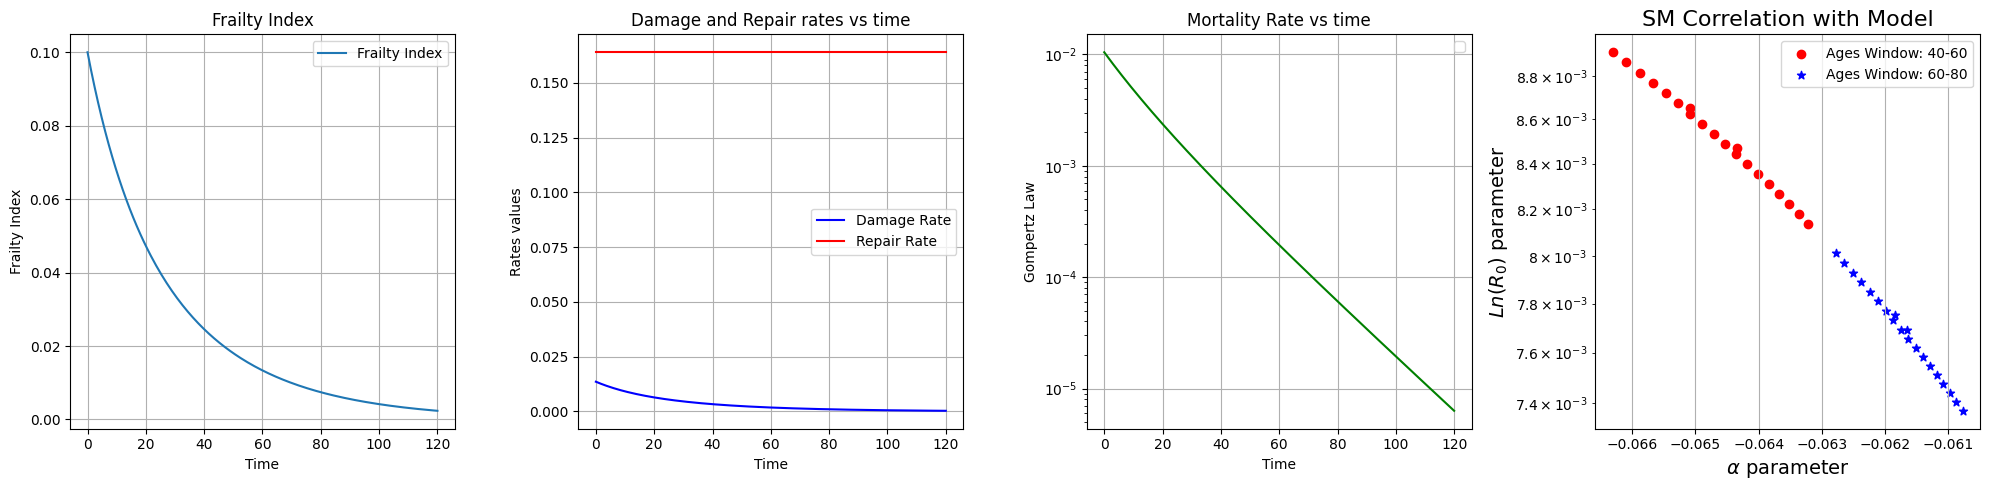

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


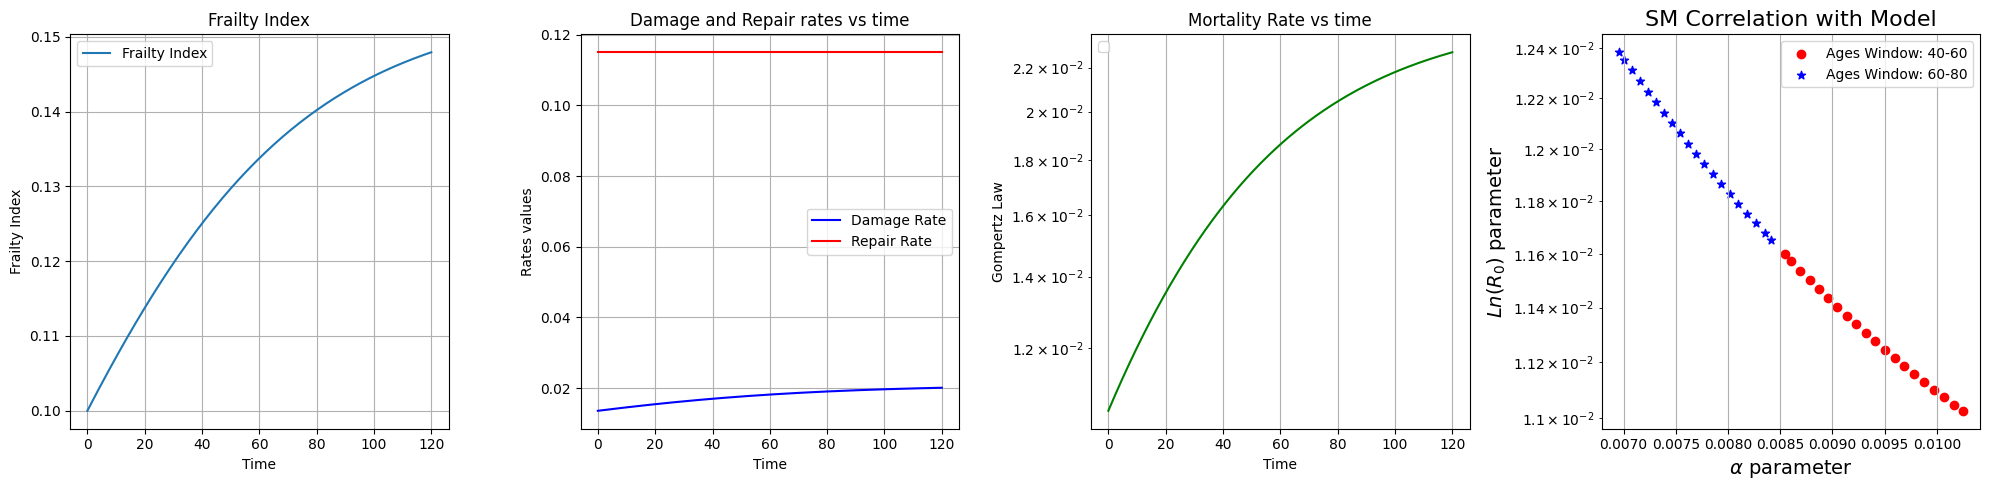

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


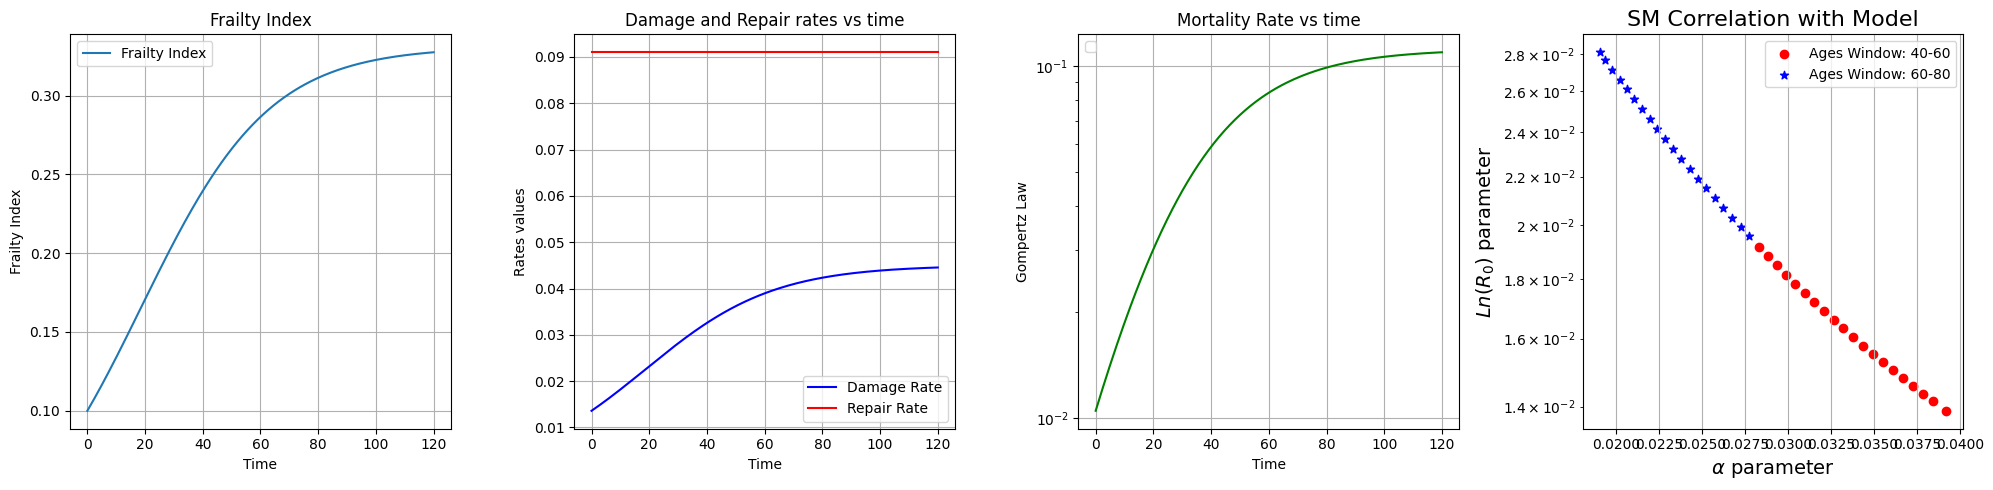

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


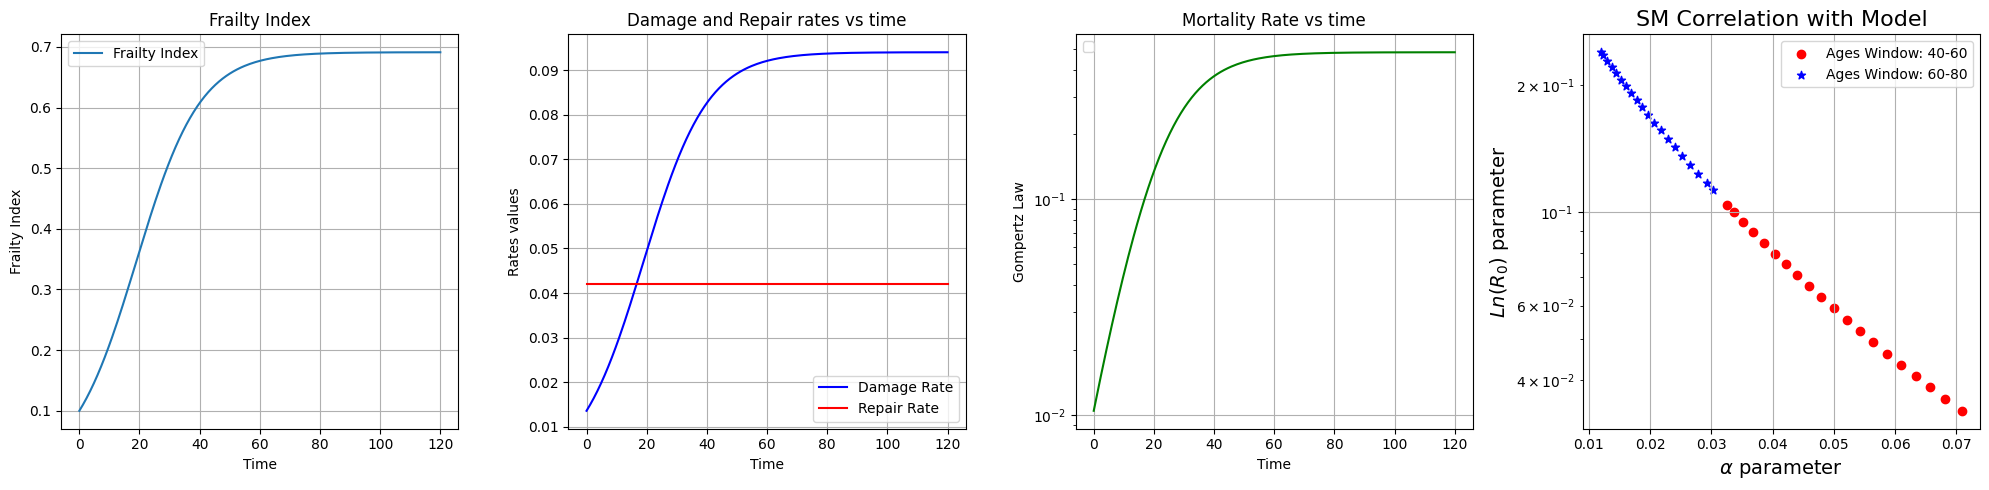

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


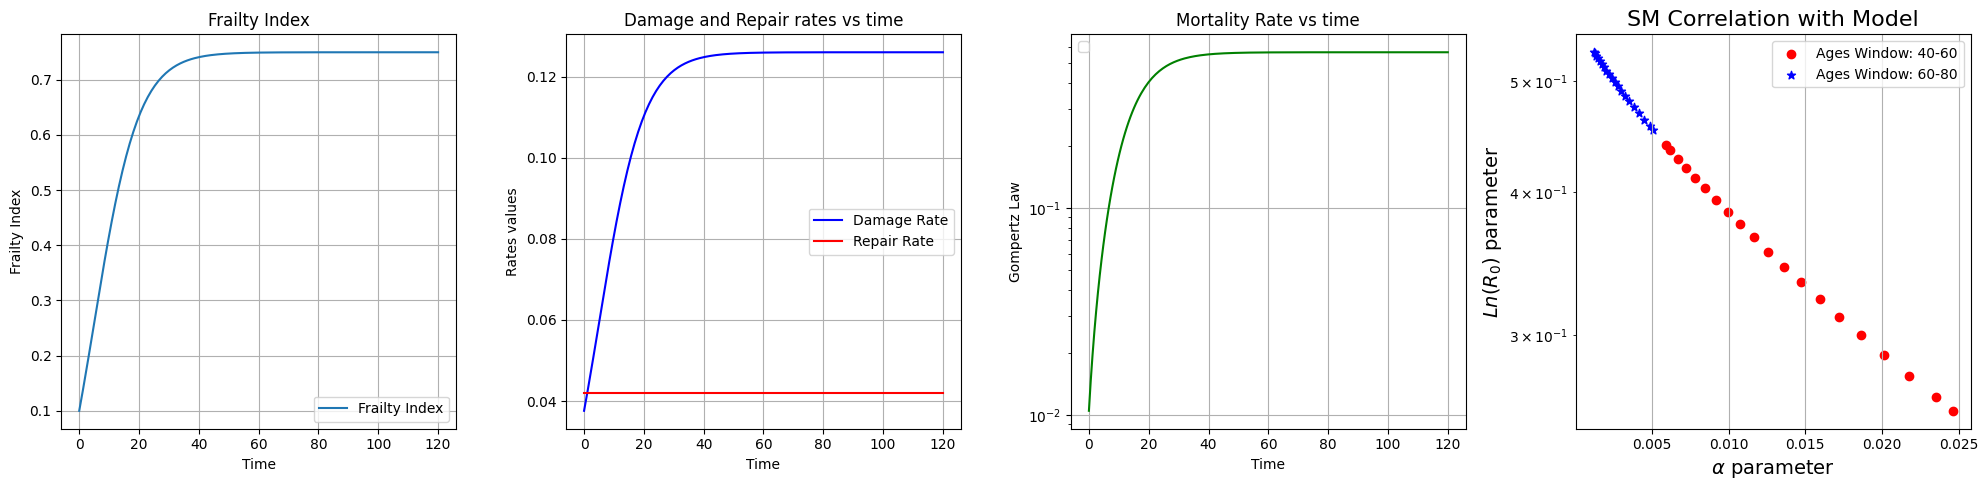

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def frailty_index_differential_equation(f,t, d, alpha, r, s):
    dfdt = (1 - f) * (d + alpha*f) - f * r * (1 - s * f*0)
    return dfdt

# Time points
t = np.linspace(0, 120, 200)  # 100 time steps from 0 to 10

# Default initial conditions and parameters
f0 = 0.1
d = 0.01
alpha = 0.001
r = 0.01
s = 0.002



def update_plot(d, alpha, r, s, initial_condition):
    f_solution = odeint(frailty_index_differential_equation, initial_condition, t,  args=(d, alpha, r, s))

    valor_damage_rate = (d + alpha*f_solution)
    valor_repair_rate = r * (1 - s * f_solution)

    c = 1.98
    frailty_index = []
    for i in f_solution:
        frailty_index.append(i[0])
    frailty_index = np.array(frailty_index)
    gompertz_law_differential_equation = frailty_index**c


    file_path = 'Frailty_Phen.csv'

    # Read the CSV file
    data = pd.read_csv(file_path)

    # Access the 'X' and 'Y' columns
    x_values = data['X']  # Assuming 'X' is the header of the column for X coordinates
    y_values = data['Y']  # Assuming 'Y' is the header of the column for Y coordinates

    edad_40_60 = t[40:60]
    data_40_60 = gompertz_law_differential_equation[40:60]
    derivative_process = dxdt(data_40_60, edad_40_60, kind="finite_difference", k=1)
    beta_values_40_60 = derivative_process/data_40_60
    R_values_40_60 = data_40_60/np.e**(beta_values_40_60*edad_40_60)


    edad_60_80 = t[60:80]
    data_60_80 = gompertz_law_differential_equation[60:80]
    derivative_process = dxdt(data_60_80, edad_60_80, kind="finite_difference", k=1)
    beta_values_60_80 = derivative_process/data_60_80
    R_values_60_80 = data_60_80/np.e**(beta_values_60_80*edad_60_80)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    
    ax1.plot(t, f_solution, label='Frailty Index')
    #ax1.scatter(x_values, y_values, color = "red")
    ax1.set_xlabel(r'Time')
    ax1.set_ylabel(r'Frailty Index')
    ax1.set_title(r'Frailty Index')
    ax1.legend()
    ax1.grid(True)
    

    ax2.plot(t, valor_damage_rate, color = "blue", label = "Damage Rate")
    ax2.plot(t, valor_repair_rate, color = "red", label = "Repair Rate")
    ax2.set_xlabel(r'Time')
    ax2.set_ylabel(r'Rates values')
    ax2.set_title(r'Damage and Repair rates vs time')
    ax2.legend()
    ax2.grid(True)

    ax3.plot(t, gompertz_law_differential_equation, color = "green")
    ax3.set_xlabel(r'Time')
    ax3.set_ylabel(r'Gompertz Law')
    ax3.set_title(r'Mortality Rate vs time')
    ax3.legend()
    ax3.set_yscale("log")
    ax3.grid(True)
    plt.savefig("Frailty_Rates_Mortality.jpg", dpi = 1000)
    

    ax4.scatter(beta_values_40_60, R_values_40_60, color = "red" ,label = "Ages Window: 40-60")
    ax4.scatter(beta_values_60_80, R_values_60_80, color= "blue", marker='*' ,label = "Ages Window: 60-80")
    ax4.set_title("SM Correlation with Model", fontsize = 16)
    ax4.set_xlabel(r"$\alpha$ parameter", fontsize = 14)
    ax4.set_ylabel(r"$Ln(R_0)$ parameter", fontsize = 14)
    ax4.set_yscale("log")
    ax4.legend()
    ax4.grid(True)

    #plt.savefig("Frailty_Rates_Mortality.jpg", dpi = 1000)

    fig.tight_layout()



# Create sliders for interactive parameter adjustment
slider_d = widgets.FloatSlider(value=d, min=0.0, max=3.0, step=0.001, description='d:')
slider_alpha = widgets.FloatSlider(value=alpha, min=0, max=2, step=0.001, description=r'$\alpha$:')
slider_r = widgets.FloatSlider(value=r, min=0, max=3, step=0.001, description='r:')
slider_s = widgets.FloatSlider(value=s, min=0, max=3, step=0.001, description='s:')
slider_initial_condition = widgets.FloatSlider(value=f0, min=0, max=1, step=0.1, description='Initial Condition:')

# Define the function to be called when sliders are changed
def on_value_change(change):
    d = slider_d.value
    alpha = slider_alpha.value
    r = slider_r.value
    s = slider_s.value
    initial_condition = slider_initial_condition.value
    update_plot(d, alpha, r, s, initial_condition)

# Attach the function to the slider value change event
slider_d.observe(on_value_change, names='value')
slider_alpha.observe(on_value_change, names='value')
slider_r.observe(on_value_change, names='value')
slider_s.observe(on_value_change, names='value')
slider_initial_condition.observe(on_value_change, names='value')

In [1]:
# Display the interactive plot and sliders
display(widgets.VBox([slider_d, slider_alpha, slider_r, slider_s, slider_initial_condition]))

update_plot(d, alpha, r, s, f0)  # Display the initial plot

NameError: name 'widgets' is not defined

In [ ]:
0.07
0.27
0.34
1
0.30

In [ ]:
x_values

In [ ]:
def frailty_index_differential_equation(f,t, d, alpha, r, s):
    dfdt = (1 - f) * (d + alpha*f) - f * r * (1 - s * f)
    return dfdt

# Time points

file_path = 'Frailty_Phen.csv'
data = pd.read_csv(file_path)
x_values = data['X']  # Assuming 'X' is the header of the column for X coordinates
y_values = data['Y']  # Assuming 'Y' is the header of the column for Y coordinates

t_model = np.linspace(60, 90, 1000)  # 100 time steps from 0 to 10

# Function to calculate the objective (sum of squared differences)
def objective(params, t_model, data_time_points, data):

    d, alpha, r, s = params
    y0 = data[0]
    solution = odeint(frailty_index_differential_equation, y0, t_model, args=(d, alpha, r, s))
    
    # Interpolate X and Y data using cubic spline to match the model time points
    interp_Y = interp1d(x_values, y_values, kind='linear')(t_model)
    
    return np.sum((solution - interp_Y)**2)

# Initial guess for the parameters
initial_guess = [0.01, 0.031, 0.32, 1]

# Optimize parameters
bounds = [(0.1,1),(0.1,1),(0.1,0.5),(0.3,2)]
result = minimize(objective, initial_guess, args=(t_model, x_values, y_values), method='Powell', bounds=bounds)

# Extract optimized parameters
optimized_params = result.x
print("Optimized Parameters:", optimized_params)

solution = odeint(frailty_index_differential_equation, y_values[0], t_model, args=(optimized_params[0], optimized_params[1], optimized_params[2], optimized_params[3]))

In [ ]:
plt.scatter(t_model, solution)
plt.scatter(t_model, interp_Y, color = "red")

In [ ]:
interp_Y = interp1d(x_values, y_values, kind='linear')(t_model)

In [ ]:
plt.scatter(x_values, y_values)

# Parameters Optimization

# Parameters Optimization


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the differential equation model for exponential decay
def model(y, t, k):
    dydt = -k * y
    return dydt

# Function to calculate the objective (sum of squared differences)
def objective(k, t, data):
    y0 = [data[0]]  # Initial condition is the first data point
    solution = odeint(model, y0, t, args=(k,))
    model_output = solution[:, 0]
    return np.sum((model_output - data)**2)

# Generate synthetic data for exponential decay
np.random.seed(42)  # For reproducibility
true_decay_rate = 0.2
time_points = np.linspace(0, 5, 50)
experimental_data = np.exp(-true_decay_rate * time_points) + 0.05 * np.random.normal(size=len(time_points))

# Initial guess for the decay rate parameter
initial_guess = [0.1]

# Optimize parameters
result = minimize(objective, initial_guess, args=(time_points, experimental_data), method='Nelder-Mead')

# Extract optimized parameters
optimized_decay_rate = result.x[0]
print("True Decay Rate:", true_decay_rate)
print("Optimized Decay Rate:", optimized_decay_rate)

# Simulate model with optimized parameters
y0 = [experimental_data[0]]
solution = odeint(model, y0, time_points, args=(optimized_decay_rate,))

# Plot the results
plt.scatter(time_points, experimental_data, label='Experimental Data', marker='o', color = "red")
plt.plot(time_points, solution[:, 0], label='Model Fit')
plt.xlabel('Time')
plt.ylabel('Variable of Interest')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt



# Define the Lotka-Volterra differential equation model
def lotka_volterra(y, t, alpha, beta, delta, gamma):
    prey, predator = y
    dpreydt = alpha * prey - beta * prey * predator
    dpredatordt = delta * prey * predator - gamma * predator
    return [dpreydt, dpredatordt]

# Function to calculate the objective (sum of squared differences)
def objective(params, t, data):
    alpha, beta, delta, gamma = params
    y0 = [data[0, 0], data[0, 1]]  # Initial conditions are the first data points
    solution = odeint(lotka_volterra, y0, t, args=(alpha, beta, delta, gamma))
    model_output = solution[:, :]
    return np.sum((model_output - data)**2)

# Generate synthetic data for Lotka-Volterra system
np.random.seed(42)
alpha_true, beta_true, delta_true, gamma_true = 0.1, 0.02, 0.01, 0.1
time_points = np.linspace(0, 100, 100)
initial_prey, initial_predator = 40, 9
true_params = [alpha_true, beta_true, delta_true, gamma_true]
experimental_data = odeint(lotka_volterra, [initial_prey, initial_predator], time_points, args=tuple(true_params))
experimental_data += 5 * np.random.normal(size=experimental_data.shape)

# Initial guess for the parameters
initial_guess = [0.15, 0.01, 0.005, 0.05]

# Optimize parameters
result = minimize(objective, initial_guess, args=(time_points, experimental_data), method='Nelder-Mead')

# Extract optimized parameters
optimized_params = result.x
print("True Parameters:", true_params)
print("Optimized Parameters:", optimized_params)

# Simulate model with optimized parameters
y0 = [experimental_data[0, 0], experimental_data[0, 1]]
solution = odeint(lotka_volterra, y0, time_points, args=tuple(optimized_params))

# Plot the results
plt.scatter(time_points, experimental_data[:, 0], label='Prey (Data)', marker='o')
plt.scatter(time_points, experimental_data[:, 1], label='Predator (Data)', marker='o')
plt.plot(time_points, solution[:, 0], label='Prey (Model)')
plt.plot(time_points, solution[:, 1], label='Predator (Model)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
